In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('/kaggle/input/coffee-sales/index.csv')
dataset

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate


In [3]:
df=dataset.copy()

In [4]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate


In [6]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

In [7]:
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.dtypes

date           datetime64[ns]
datetime               object
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object

In [10]:
df=df.drop(columns=['datetime'])
df

,date,cash_type,card,money,coffee_name
0,2024-03-01,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...
891,2024-06-29,card,ANON-0000-0000-0009,37.72,Latte
892,2024-06-30,card,ANON-0000-0000-0336,37.72,Latte
893,2024-06-30,card,ANON-0000-0000-0337,23.02,Espresso
894,2024-06-30,card,ANON-0000-0000-0009,37.72,Hot Chocolate


In [13]:
df.isnull().sum()

date            0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [14]:
df=df.drop(columns=['card'])

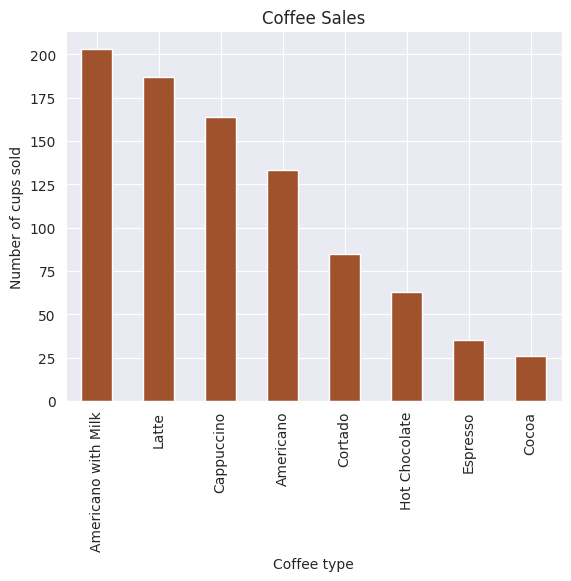

In [21]:
sns.set_style("darkgrid")
graph1=df['coffee_name'].value_counts().plot(kind='bar',title='Coffee Sales', color='sienna')
graph1.set_xlabel('Coffee type')
graph1.set_ylabel('Number of cups sold');

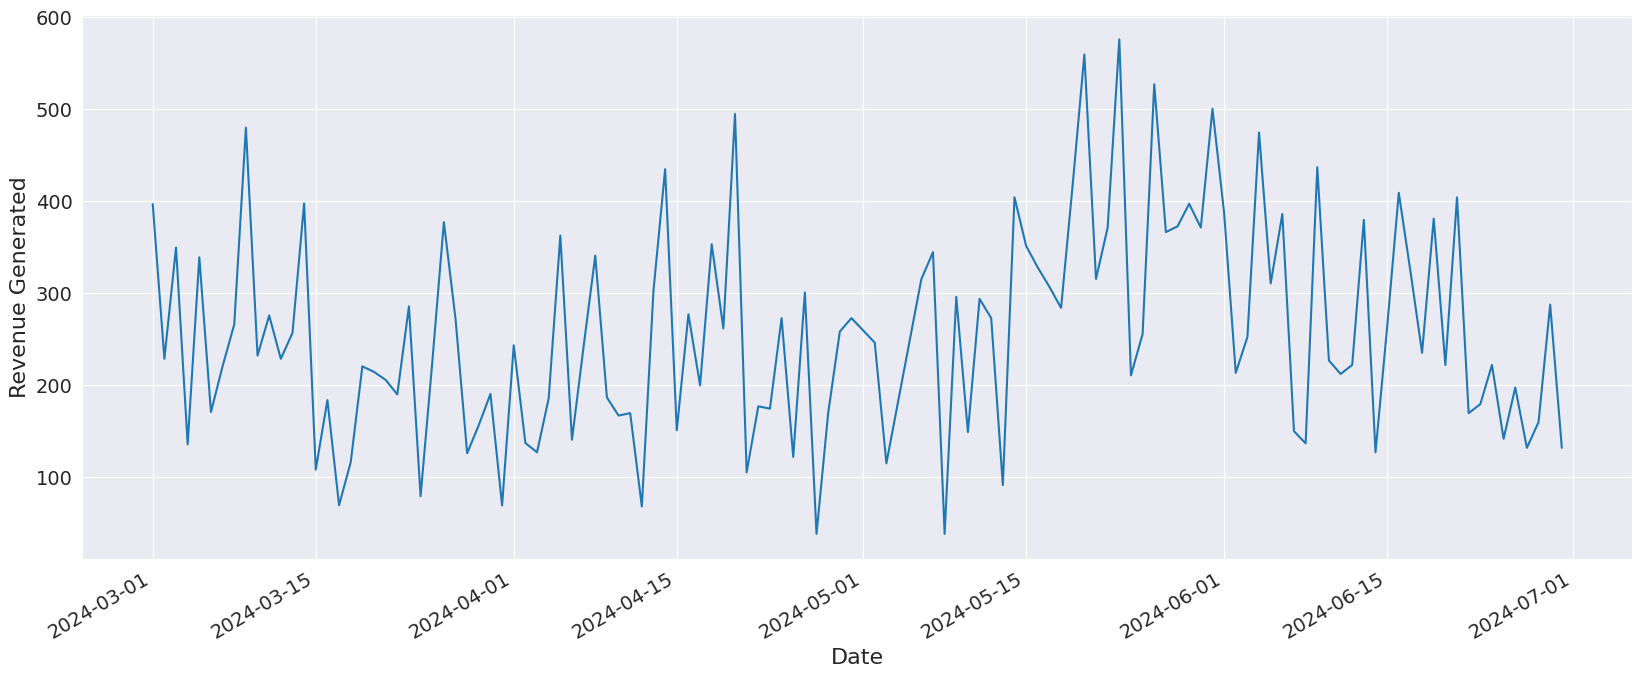

In [59]:
plt.figure(figsize=(20,8))
graph2=df.groupby('date').agg('sum').money.plot(kind='line')
graph2.set_xlabel('Date', fontsize=16)
graph2.set_ylabel('Revenue Generated',  fontsize=16)
graph2.tick_params(axis='both', which='major', labelsize=14);

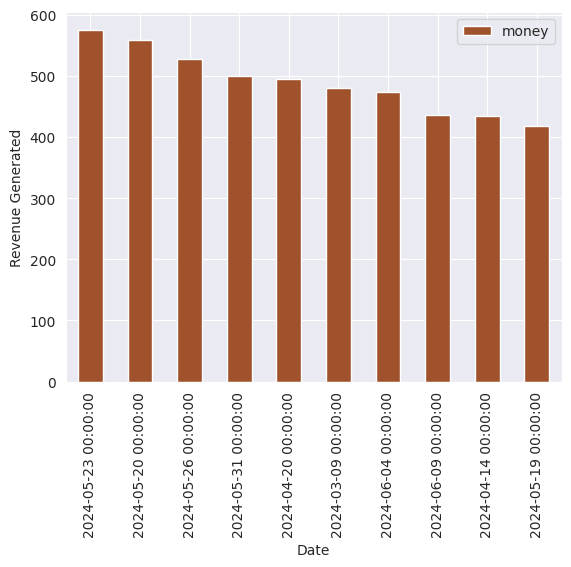

In [108]:
#Top 10 days with highest sales in terms of revenue

graph3=df.groupby('date').agg('sum','count').sort_values(by=('money'), ascending=False).head(10).plot(kind='bar', color='sienna');
graph3.set_xlabel('Date')
graph3.set_ylabel('Revenue Generated');

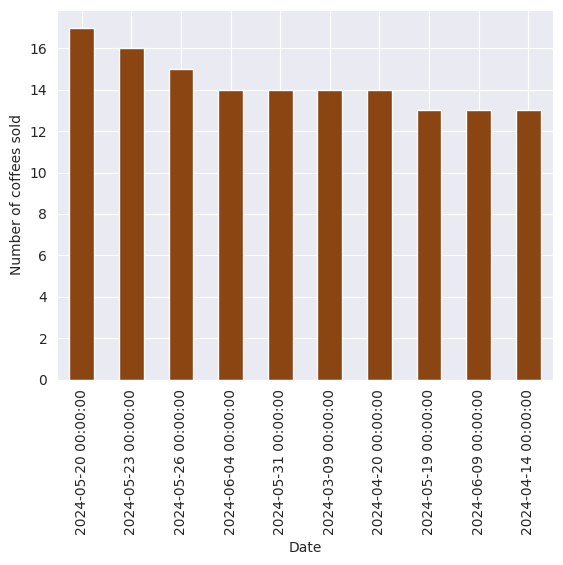

In [121]:
#Top 10 days with highest sales in terms of quantity of cups

graph4=df.groupby('date').agg('count').sort_values(by=('coffee_name'), ascending=False).coffee_name.head(10).plot(kind='bar', color='saddlebrown');
graph4.set_xlabel('Date')
graph4.set_ylabel('Number of coffees sold');